In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import random
#绘图库
%matplotlib inline  
import matplotlib.pyplot as plt

* %run ipython_script_test.py
* 这里假设ipython_script_test.py在当前路径，运行其他脚本文件

## Pandas 核心分为Series和DataFrame

### 1、 Series

In [2]:
s=pd.Series([3,4,5,4,4],index=['a','c','d','m','d'])
s

a    3
c    4
d    5
m    4
d    4
dtype: int64

In [3]:
s.dtypes

dtype('int64')

In [4]:
s.describe()

count    5.000000
mean     4.000000
std      0.707107
min      3.000000
25%      4.000000
50%      4.000000
75%      4.000000
max      5.000000
dtype: float64

In [5]:
s[0] #s['a']

3

In [6]:
s['a']

3

In [7]:
s[0:2]

a    3
c    4
dtype: int64

In [8]:
s[['a','c']] #多维放在列表里面

a    3
c    4
dtype: int64

In [9]:
s[0]=0 #赋值
s

a    0
c    4
d    5
m    4
d    4
dtype: int64

In [10]:
s[s > 4] #筛选

d    5
dtype: int64

In [11]:
s

a    0
c    4
d    5
m    4
d    4
dtype: int64

In [12]:
s.value_counts() #统计各值出现的次数

4    3
5    1
0    1
dtype: int64

In [13]:
s.isin([4]) #判断值里面有无

a    False
c     True
d    False
m     True
d     True
dtype: bool

### 高级取值

In [14]:
s[s.isin([4])]

c    4
m    4
d    4
dtype: int64

## 2、DataFrame

In [15]:
#字典对象
data={'color':['biue','green','yellow','red','white'],
     'object':['ball','pen','pencil','paper','mug'],
     'price':[1,2,3,5,5]}

In [16]:
frame=pd.DataFrame(data)
frame

,color,object,price
0,biue,ball,1
1,green,pen,2
2,yellow,pencil,3
3,red,paper,5
4,white,mug,5


In [17]:
frame.dtypes

color     object
object    object
price      int64
dtype: object

### 索引排序和值排序

In [18]:
frame.sort_index(axis=1, ascending=False) #栏位倒序排

,price,object,color
0,1,ball,biue
1,2,pen,green
2,3,pencil,yellow
3,5,paper,red
4,5,mug,white


In [19]:
frame.sort_values(by=['price','object'],ascending=False).head(3) #以price和object倒序

,color,object,price
3,red,paper,5
4,white,mug,5
2,yellow,pencil,3


### 选择

In [20]:
frame

,color,object,price
0,biue,ball,1
1,green,pen,2
2,yellow,pencil,3
3,red,paper,5
4,white,mug,5


In [21]:
frame.color  #frame['color']

0      biue
1     green
2    yellow
3       red
4     white
Name: color, dtype: object

In [22]:
frame2 = pd.DataFrame(frame,columns=['object','price']) #取部分栏 frame[['object','price']]
frame2

,object,price
0,ball,1
1,pen,2
2,pencil,3
3,paper,5
4,mug,5


In [23]:
frame[0:3]

,color,object,price
0,biue,ball,1
1,green,pen,2
2,yellow,pencil,3


In [24]:
frame['object'][0] #取值

'ball'

In [25]:
frame['new']=12 #加新栏位
frame

,color,object,price,new
0,biue,ball,1,12
1,green,pen,2,12
2,yellow,pencil,3,12
3,red,paper,5,12
4,white,mug,5,12


In [26]:
frame[frame.isin(['ball','pen'])] #取需要的值

,color,object,price,new
0,NaN,ball,NaN,NaN
1,NaN,pen,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [27]:
# 删除一列
del frame['new']
frame

,color,object,price
0,biue,ball,1
1,green,pen,2
2,yellow,pencil,3
3,red,paper,5
4,white,mug,5


In [28]:
frame[frame > 4] #筛选

,color,object,price
0,biue,ball,NaN
1,green,pen,NaN
2,yellow,pencil,NaN
3,red,paper,5.0
4,white,mug,5.0


In [30]:
#字典对象
data={'color':['biue','green','yellow','red','white'],
     'object':['ball','pen','pencil','paper','mug'],
     'price':[1,2,3,5,5]}
frame=pd.DataFrame(data,index=['a','b','c','d','e'])
frame

,color,object,price
a,biue,ball,1
b,green,pen,2
c,yellow,pencil,3
d,red,paper,5
e,white,mug,5


In [31]:
frame.drop(['a','b']) #删除2行

,color,object,price
c,yellow,pencil,3
d,red,paper,5
e,white,mug,5


In [33]:
frame

,color,object,price
a,biue,ball,1
b,green,pen,2
c,yellow,pencil,3
d,red,paper,5
e,white,mug,5


In [34]:
frame.loc[:,['color','object']]

,color,object
a,biue,ball
b,green,pen
c,yellow,pencil
d,red,paper
e,white,mug


### 只能数字操作

In [36]:
frame.iloc[3]

color       red
object    paper
price         5
Name: d, dtype: object

In [38]:
frame.iloc[:,2:3]

,price
a,1
b,2
c,3
d,5
e,5


In [39]:
frame.drop(['color','price'],axis=1) #或者用del

,object
a,ball
b,pen
c,pencil
d,paper
e,mug


### Dataframe之groupby 

In [44]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],'key2':['one','two','one','two','one'],'data1':np.random.randint(1,5,5),'data2':np.random.randint(1,5,5)})
#df.to_excel('foo.xlsx', sheet_name='sheet1') #写入excel，自己在excel里面对比练习
df

,data1,data2,key1,key2
0,2,2,a,one
1,4,3,a,two
2,4,2,b,one
3,1,1,b,two
4,2,3,a,one


In [55]:
group1 = df.groupby('key1')
[x for x in group1]

[('a',    data1  data2 key1 key2
  0      2      2    a  one
  1      4      3    a  two
  4      2      3    a  one), ('b',    data1  data2 key1 key2
  2      4      2    b  one
  3      1      1    b  two)]

In [57]:
group1.size() #数组元素的总数。这等于shape的元素的乘积。

key1
a    3
b    2
dtype: int64

In [58]:
group1.sum()

,data1,data2
key1,,
a,8,8
b,5,3


In [59]:
group1.count()

,data1,data2,key2
key1,,,
a,3,3,3
b,2,2,2


In [60]:
group1['data1'].agg(['mean','sum'])

,mean,sum
key1,,
a,2.666667,8
b,2.500000,5


In [61]:
group1['data1','data2'].agg(['mean','sum'])

data1         data2    
          mean sum      mean sum
key1                            
a     2.666667   8  2.666667   8
b     2.500000   5  1.500000   3

In [62]:
df.groupby(['key1','key2']).apply(np.mean)

data1  data2
key1 key2              
a    one     2.0    2.5
     two     4.0    3.0
b    one     4.0    2.0
     two     1.0    1.0

### 数据透视表pivot_table 

可以产生类似于excel数据透视表的结果，相当的直观。

1）分组统计

其中参数index指定“行”键，columns指定“列”键。

In [63]:
df

,data1,data2,key1,key2
0,2,2,a,one
1,4,3,a,two
2,4,2,b,one
3,1,1,b,two
4,2,3,a,one


In [64]:
pd.pivot_table(df, index=['key1','key2']) #数据分组

data1  data2
key1 key2              
a    one     2.0    2.5
     two     4.0    3.0
b    one     4.0    2.0
     two     1.0    1.0

### 等效操作

In [65]:
df.pivot_table(index=['key1','key2']) #类似分组

data1  data2
key1 key2              
a    one     2.0    2.5
     two     4.0    3.0
b    one     4.0    2.0
     two     1.0    1.0

In [66]:
pd.pivot_table(df, index=['key1','key2'],values=['data1',"data2"]) #数据分组

data1  data2
key1 key2              
a    one     2.0    2.5
     two     4.0    3.0
b    one     4.0    2.0
     two     1.0    1.0

### 交叉表
交叉表是用于统计分组频率的特殊透视表

In [67]:
data = pd.DataFrame({'Sample': np.arange(1, 11),
        'Nationality': ['USA', 'Japan', 'USA', 'Japan', 'Japan', 'Japan', 'USA', 'USA', 'Japan', 'USA'],
        'Handedness': ['Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed', 'Right-handed', 'Right-handed']})
data.head(3)

,Handedness,Nationality,Sample
0,Right-handed,USA,1
1,Left-handed,Japan,2
2,Right-handed,USA,3


In [68]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [69]:
df = DataFrame({'类别':['水果','水果','水果','蔬菜','蔬菜','肉类','肉类'],
                '产地':['美国','中国','中国','中国','新西兰','新西兰','美国'],
                '水果':['苹果','梨','草莓','番茄','黄瓜','羊肉','牛肉'],
               '数量':[5,5,9,3,2,10,8],
               '价格':[5,5,10,3,3,13,20]})
df

,产地,价格,数量,水果,类别
0,美国,5,5,苹果,水果
1,中国,5,5,梨,水果
2,中国,10,9,草莓,水果
3,中国,3,3,番茄,蔬菜
4,新西兰,3,2,黄瓜,蔬菜
5,新西兰,13,10,羊肉,肉类
6,美国,20,8,牛肉,肉类


In [70]:
df.pivot_table(index=['产地','类别'],margins=True)

价格    数量
产地  类别                 
中国  水果   7.500000   7.0
    蔬菜   3.000000   3.0
新西兰 肉类  13.000000  10.0
    蔬菜   3.000000   2.0
美国  水果   5.000000   5.0
    肉类  20.000000   8.0
All      8.428571   6.0

In [71]:
pd.crosstab(df.类别,df['产地'],margins=True) # 按类别分组，统计各个分组中产地的频数  df['产地']

产地,中国,新西兰,美国,All
类别,,,,
水果,2,0,1,3
肉类,0,1,1,2
蔬菜,1,1,0,2
All,3,2,2,7


## 用pandas和seaborn绘图

In [72]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.687664
10   -0.822322
20   -1.017596
30    0.401019
40    0.714622
50   -0.046818
60   -1.556443
70   -3.666664
80   -3.367402
90   -4.028810
dtype: float64

In [73]:
s.plot()plt.plot(np.random.randn(50).cumsum())

SyntaxError: invalid syntax (<ipython-input-73-c5c8bc1b0d7b>, line 1)

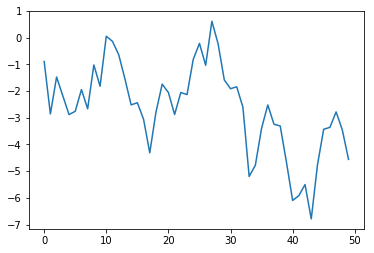

In [74]:
plt.plot(np.random.randn(50).cumsum())

## Numpy.cumsum（） 用法 ( np.cumsum)
[cumsum（）的用法](https://www.jianshu.com/p/00cddc31db4d )

'''
轴参数返回元素的梯形累计和，axis=0，按照行累加。axis=1，按照列累加。axis不给定具体值，就把numpy数组当成一个一维数组。
'''

In [75]:
a = np.array([[1,2,3], [4,5,6]])
print(a)
#print(np.cumsum(a))#按照2前面累加
#print(np.cumsum(a,axis=0)) #按照行累加，行求和
print(np.cumsum(a,axis=1)) #按照列累加，列求和(列累加，就是自己累加)

[[1 2 3]
 [4 5 6]]
[[ 1  3  6]
 [ 4  9 15]]


In [76]:
np.random.randn(10, 4)

array([[ 0.21114914, -1.93698512,  0.44596753,  1.16821387],
       [-0.93019203, -0.5857329 ,  1.97767747, -0.25749243],
       [-0.05636664,  0.86831542, -0.78162004,  0.81452226],
       [-0.34028896,  0.86211279, -0.41778821, -0.93928762],
       [-0.45102216, -0.64121142, -0.57307068, -0.43350135],
       [ 1.56867271, -0.45908704,  2.25682253,  1.20949739],
       [ 2.4156188 , -1.41213907,  0.10617667,  1.0546314 ],
       [ 0.1558686 ,  0.88538752, -0.79300147,  0.75443226],
       [ 1.03977605,  0.41096742,  0.5167877 , -1.11593286],
       [-1.39262753, -1.31210949,  0.67128798,  0.11284444]])

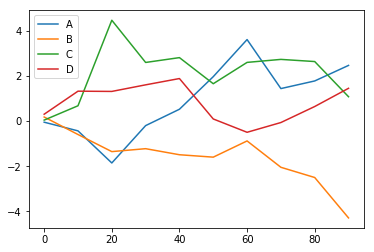

In [77]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

In [78]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.sort_index(axis=0,ascending=True)

Genus,A,B,C,D
five,0.787652,0.761103,0.942953,0.168103
four,0.793021,0.653163,0.804341,0.080326
one,0.195980,0.624245,0.637121,0.261788
six,0.581540,0.624575,0.692865,0.518005
three,0.325100,0.413971,0.845751,0.138123
two,0.934631,0.864025,0.646718,0.463070


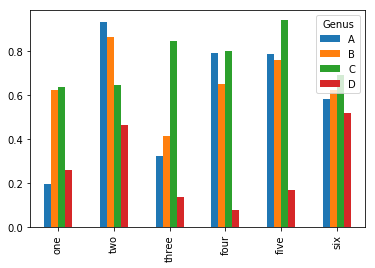

In [79]:
df.plot.bar()

In [80]:
# 淡入绘图库
import seaborn as sns

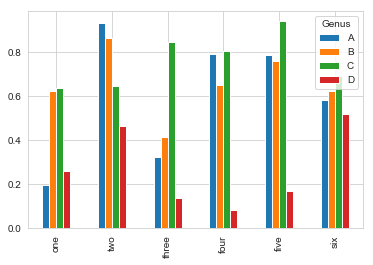

In [81]:
 sns.set_style("whitegrid") 
 df.plot.bar() # 可以看到导入seaborn后画出来的图漂亮多了

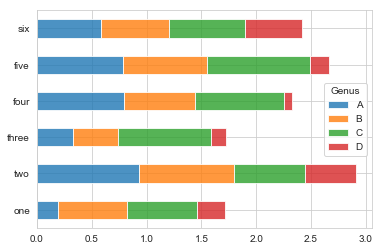

In [82]:
df.plot.barh(stacked=True, alpha=0.8)